In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats import pearsonr

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 8,4

plt.style.use = ('seaborn-whitegrid')

In [4]:
df = pd.read_csv('Continuous.csv')

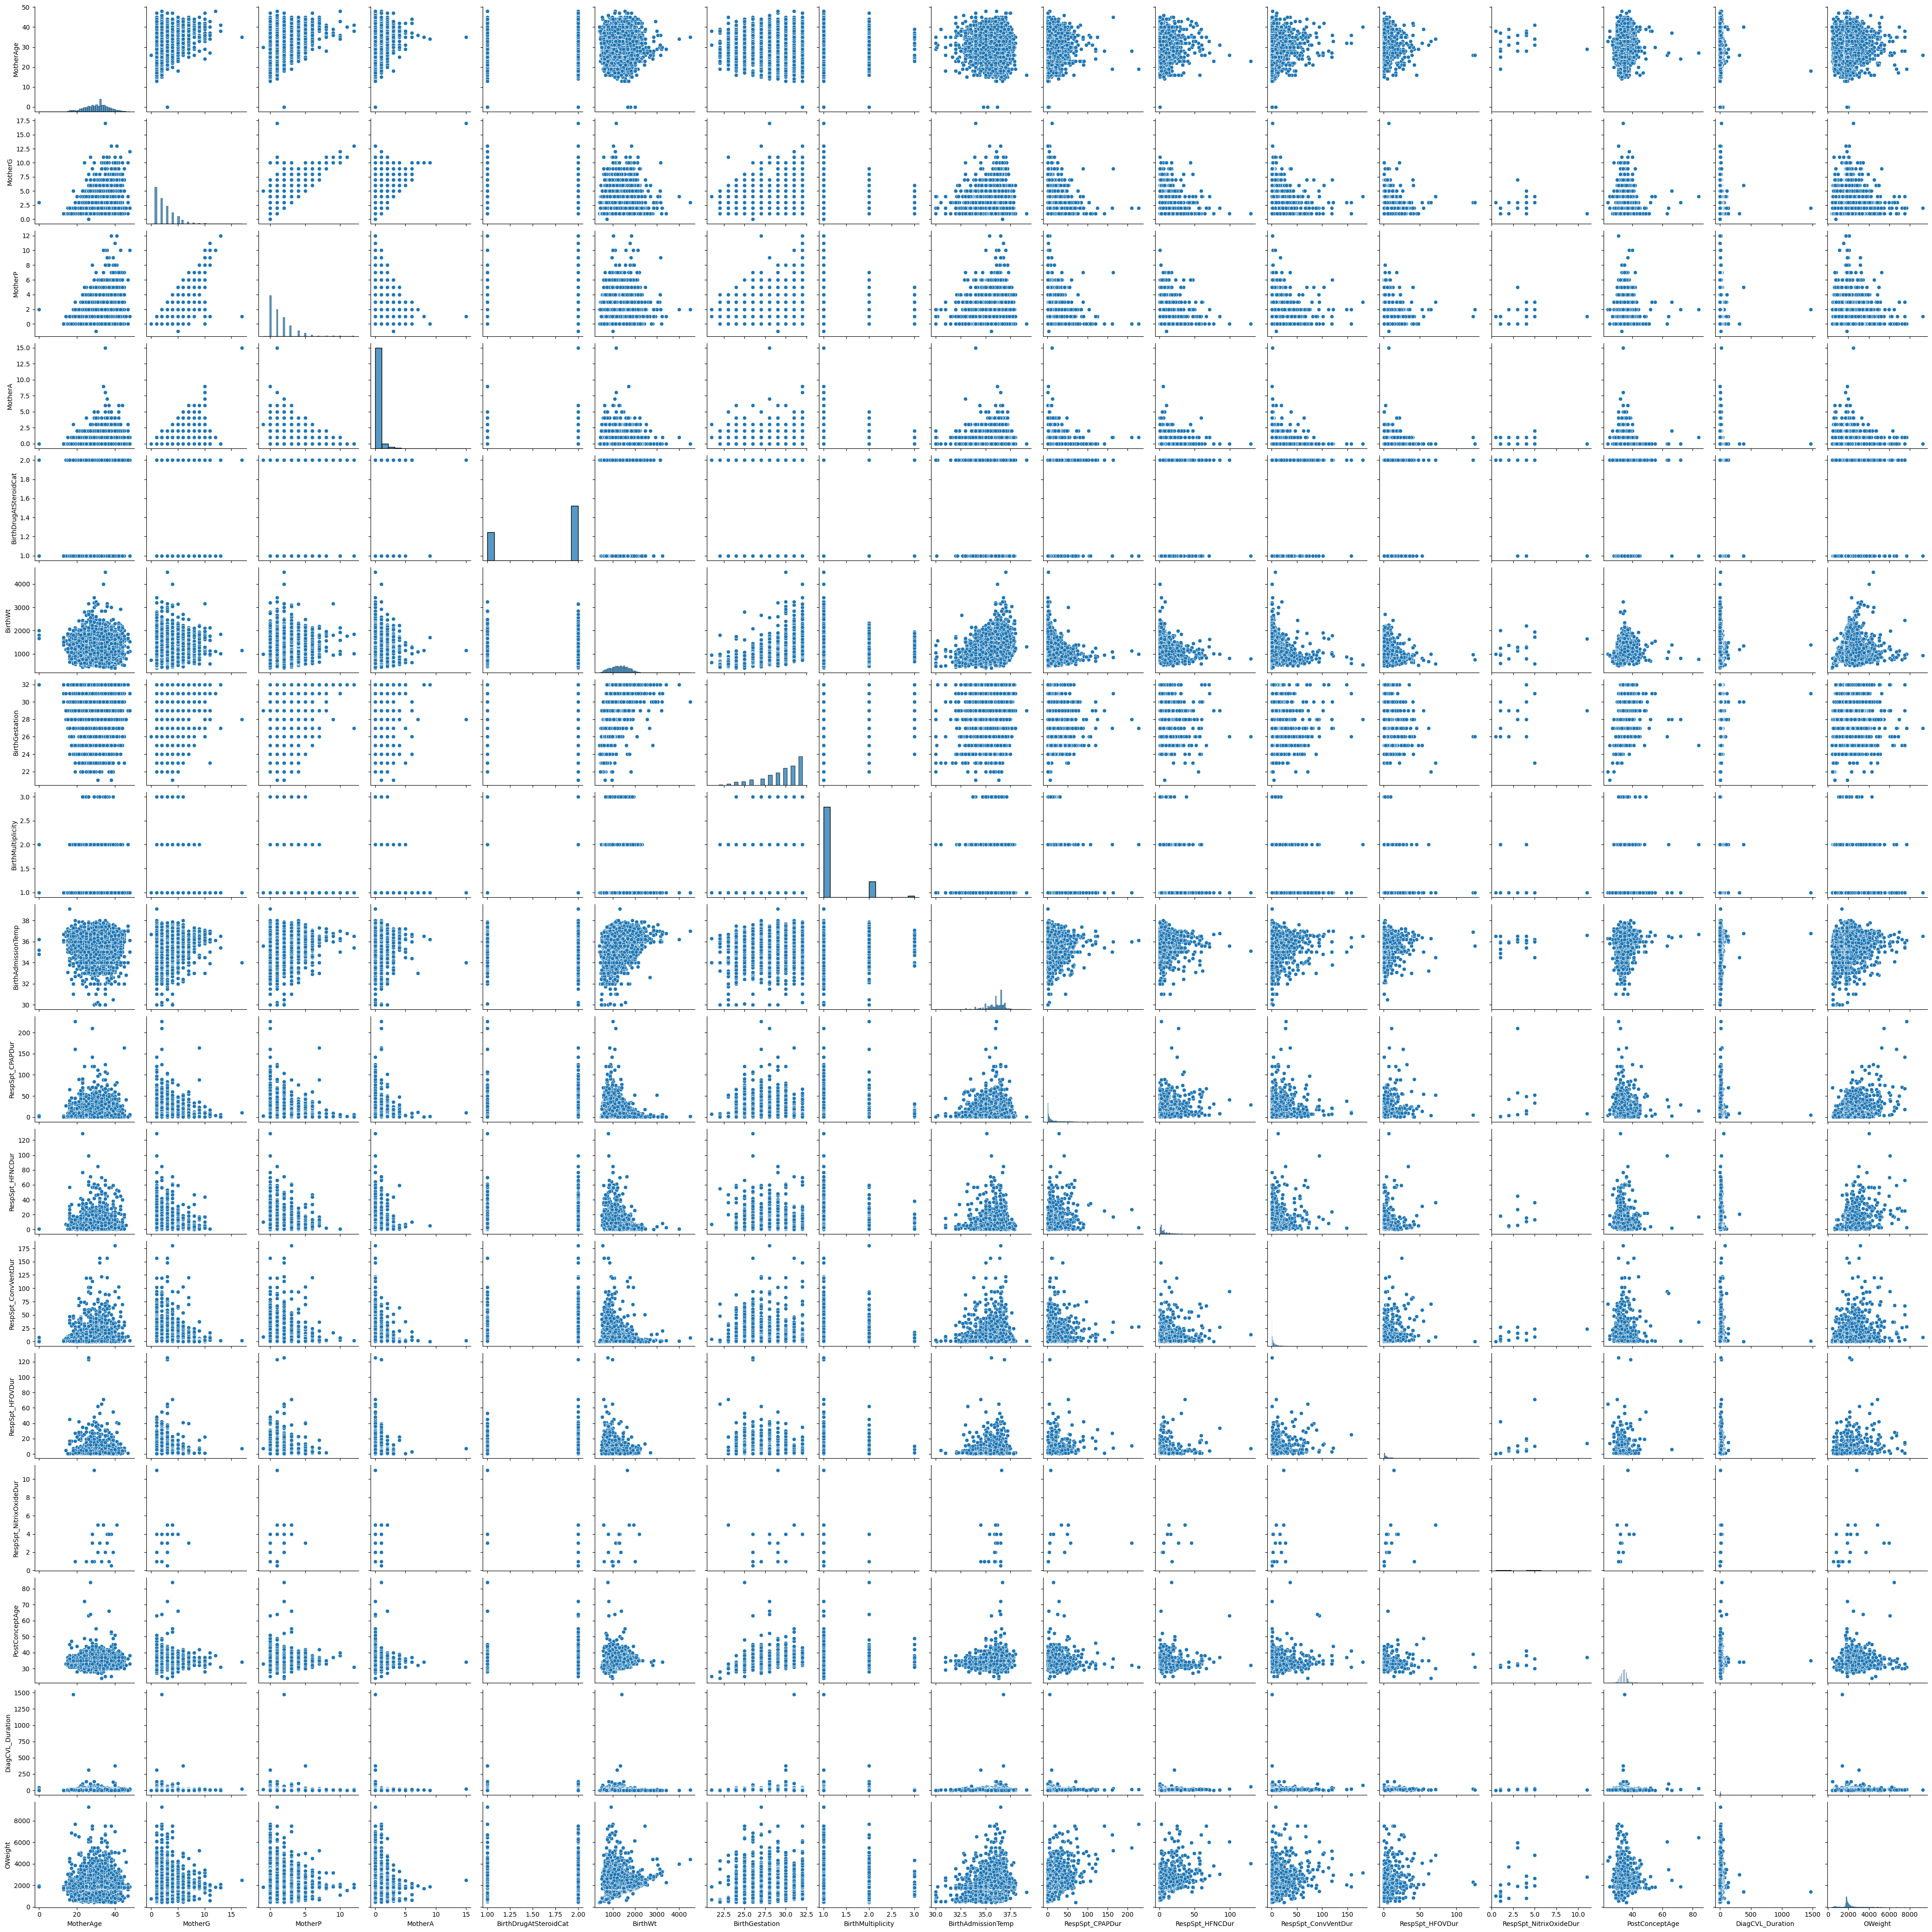

In [5]:
sb.pairplot(df)

In [6]:
corr = df.corr()
corr

,MotherAge,MotherG,MotherP,MotherA,BirthDrugAtSteroidCat,BirthWt,BirthGestation,BirthMultiplicity,BirthAdmissionTemp,RespSpt_CPAPDur,RespSpt_HFNCDur,RespSpt_ConvVentDur,RespSpt_HFOVDur,RespSpt_NitrixOxideDur,PostConceptAge,DiagCVL_Duration,OWeight
MotherAge,1.000000,0.469310,0.440807,0.214910,0.091908,0.007757,0.033759,-0.004580,-0.013413,-0.006295,-0.006150,0.021882,-0.038885,0.096674,0.026827,-0.016348,-0.004354
MotherG,0.469310,1.000000,0.882253,0.516293,0.037665,0.079923,0.059054,-0.006131,0.001444,-0.043173,-0.044869,-0.005572,-0.032407,0.088647,0.021091,-0.012269,-0.004024
MotherP,0.440807,0.882253,1.000000,0.127765,0.001298,0.113986,0.087739,0.007070,0.013048,-0.064894,-0.082225,0.000962,-0.032292,0.226578,0.026475,-0.002474,0.002839
MotherA,0.214910,0.516293,0.127765,1.000000,0.072290,-0.030634,-0.030003,-0.019309,-0.029903,0.011337,0.017142,-0.009983,-0.021250,0.030667,-0.010083,-0.009812,-0.013020
BirthDrugAtSteroidCat,0.091908,0.037665,0.001298,0.072290,1.000000,-0.062428,0.021684,0.037539,-0.008506,0.046408,0.012190,0.020922,0.006869,-0.512061,0.034659,0.004827,0.007146
BirthWt,0.007757,0.079923,0.113986,-0.030634,-0.062428,1.000000,0.720251,-0.025904,0.304266,-0.403537,-0.320840,-0.271329,-0.202474,0.359075,0.176331,-0.100344,0.215891
BirthGestation,0.033759,0.059054,0.087739,-0.030003,0.021684,0.720251,1.000000,0.029252,0.250509,-0.445317,-0.349733,-0.283481,-0.214367,0.251001,0.416635,-0.054074,0.145969
BirthMultiplicity,-0.004580,-0.006131,0.007070,-0.019309,0.037539,-0.025904,0.029252,1.000000,0.040581,0.003012,-0.010467,0.013656,0.020698,-0.078880,0.075281,0.012549,-0.002157
BirthAdmissionTemp,-0.013413,0.001444,0.013048,-0.029903,-0.008506,0.304266,0.250509,0.040581,1.000000,-0.083441,-0.080295,-0.063944,0.018205,0.233164,0.110291,-0.006683,0.132288
RespSpt_CPAPDur,-0.006295,-0.043173,-0.064894,0.011337,0.046408,-0.403537,-0.445317,0.003012,-0.083441,1.000000,0.296442,0.265604,0.178535,-0.047215,-0.107745,0.082639,0.480709


<AxesSubplot: >

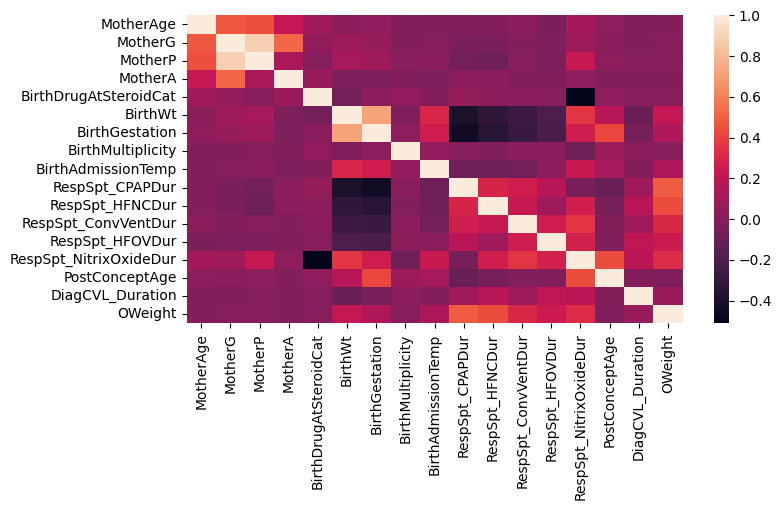

In [8]:
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [9]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [20]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

2

In [15]:
corr_features

{'BirthGestation', 'MotherP'}

In [16]:
df.drop(corr_features,axis=1)

,MotherAge,MotherG,MotherA,BirthDrugAtSteroidCat,BirthWt,BirthMultiplicity,BirthAdmissionTemp,RespSpt_CPAPDur,RespSpt_HFNCDur,RespSpt_ConvVentDur,RespSpt_HFOVDur,RespSpt_NitrixOxideDur,PostConceptAge,DiagCVL_Duration,OWeight
0,28.0,5.0,2.0,2.0,1710,2,37.0,1.0,NaN,0.5,0.5,NaN,NaN,1.0,1710
1,18.0,1.0,0.0,2.0,740,1,36.5,NaN,NaN,2.0,1.0,NaN,NaN,1.0,740
2,36.0,3.0,0.0,1.0,1600,1,36.6,3.0,4.0,28.0,1.0,NaN,NaN,8.0,1780
3,28.0,5.0,1.0,2.0,1390,1,35.7,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1390
4,42.0,2.0,1.0,1.0,1280,1,36.5,1.0,NaN,1.0,NaN,NaN,NaN,10.0,1800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,33.0,2.0,0.0,2.0,2070,1,36.8,NaN,5.0,NaN,NaN,NaN,NaN,0.0,2340
4806,38.0,3.0,0.0,NaN,1100,1,36.5,4.0,4.0,NaN,NaN,NaN,35.0,0.0,2000
4807,42.0,4.0,0.0,NaN,2150,1,36.6,6.0,3.0,4.0,2.0,NaN,NaN,0.0,2170
4808,21.0,3.0,1.0,1.0,711,1,33.7,NaN,NaN,1.0,NaN,NaN,NaN,0.0,700
